# 지하철 이용현황 공공데이터 분석

## 엑셀 파일 통합 정리

In [2]:
import pandas as pd

### 1. raw 파일 불러오기
- 일자/노선/자하철역별 승하차 고객수

In [3]:
# 19년도 상반기
file = './data/sec5_raw/CARD_SUBWAY_MONTH_201901.csv'
raw = pd.read_csv(file)

raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18334 entries, 0 to 18333
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    18334 non-null  int64 
 1   노선명     18334 non-null  object
 2   역ID     18334 non-null  int64 
 3   역명      18334 non-null  object
 4   승차총승객수  18334 non-null  int64 
 5   하차총승객수  18334 non-null  int64 
 6   등록일자    18334 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1002.8+ KB


#### 참고) 판다스로 파일 읽어오기
**데이터 파일 읽기: read_excel/read_csv**
**옵션**
- index_col = 컬럼 인덱스 번호     # 몇번째 컬럼을 인덱스로 지정할 것인지 선택
- header = raw 인덱스 번호       # 몇번째 raw부터 포 데이터로 볼 것인지 선택
- thousands = ','       # 천 단위 기호, 사용 시 숫자로 인식

In [5]:
# 2개 파일 합치기

raw = pd.DataFrame()

file1 = './data/sec5_raw/CARD_SUBWAY_MONTH_201901.csv'
file2 = './data/sec5_raw/CARD_SUBWAY_MONTH_201902.csv'

temp = pd.read_csv(file1)
raw = pd.concat([raw,temp])

temp = pd.read_csv(file2)
raw = pd.concat([raw,temp])

In [6]:
raw

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104
...,...,...,...,...,...,...,...
16538,20190228,우이신설선,4709,북한산보국문,6564,6029,20190303
16539,20190228,우이신설선,4710,정릉,4821,4348,20190303
16540,20190228,경춘선,1314,퇴계원,4212,3899,20190303
16541,20190228,우이신설선,4711,성신여대입구(돈암),4058,4452,20190303


#### 폴더에 있는 모든 파일 불러와서 병합하기

In [7]:
import os   # os 라이브러리 : 폴더/파일 관리

In [8]:
dirpath = './data/sec5_raw/'
files = os.listdir(dirpath)       # 폴더에 있는 파일 리스트 확인
files

['CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201906.csv']

In [9]:
# 여러 개의 파일 병합하기
raw = pd.DataFrame()

for file in files:
    # print(dirpath+file)
    temp = pd.read_csv(dirpath+file)
    raw = pd.concat([raw, temp], ignore_index=True)     # ignore_index == reset_index(drop=True)

raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


In [10]:
raw.tail()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
99337,20190630,2호선,204,을지로4가,4940,4668,20190703
99338,20190630,2호선,203,을지로3가,12043,11854,20190703
99339,20190630,2호선,202,을지로입구,31622,29723,20190703
99340,20190630,2호선,201,시청,10178,8214,20190703
99341,20190630,1호선,159,동묘앞,13859,14352,20190703


In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   노선명     99342 non-null  object
 2   역ID     99342 non-null  int64 
 3   역명      99342 non-null  object
 4   승차총승객수  99342 non-null  int64 
 5   하차총승객수  99342 non-null  int64 
 6   등록일자    99342 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 5.3+ MB


#### 요일 추가하기

In [12]:
from datetime import datetime

**datetime.strptime('날짜str', str 형태): 문자-->날짜타입**
- str 형태: %Y-%m-%d %H:%M:%S

**weekday(): 날짜 타입을 요일로 변경**
- 월요일:0 ~ 일요일:6

In [13]:
# 날짜 컬럼을 요일로 변경해 리스트로 저장
weekday_dict = ['월', '화', '수', '목', '금', '토', '일']

weekday_list = []

for date_str in raw['사용일자']:
    date = datetime.strptime(str(date_str), "%Y%m%d")
    weekday_index = date.weekday()
    weekday = weekday_dict[weekday_index]

    weekday_list.append(weekday)

In [14]:
# 요일 컬럼 추가
raw['요일'] = weekday_list
raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
0,20190101,경춘선,1323,가평,1520,1436,20190104,화
1,20190101,경춘선,1322,상천,275,114,20190104,화
2,20190101,경춘선,1321,청평,1509,1083,20190104,화
3,20190101,경춘선,1320,대성리,357,271,20190104,화
4,20190101,경춘선,1319,마석,1772,1963,20190104,화


In [15]:
raw.tail()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
99337,20190630,2호선,204,을지로4가,4940,4668,20190703,일
99338,20190630,2호선,203,을지로3가,12043,11854,20190703,일
99339,20190630,2호선,202,을지로입구,31622,29723,20190703,일
99340,20190630,2호선,201,시청,10178,8214,20190703,일
99341,20190630,1호선,159,동묘앞,13859,14352,20190703,일


In [16]:
raw.sample(10)     # 중간의 임의의 데이터 확인

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
1253,20190103,수인선,1885,연수,5261,5260,20190106,목
18403,20190201,경인선,1814,소사,11251,10297,20190204,금
95719,20190624,2호선,247,도림천,1510,1615,20190627,월
7820,20190114,과천선,1457,범계,30591,29530,20190117,월
43440,20190325,경강선,1502,이매,1347,1234,20190328,월
79076,20190527,경의선,1262,공덕,3951,3379,20190530,월
17327,20190130,우이신설선,4701,북한산우이,2434,2115,20190202,수
59518,20190422,4호선,409,당고개,14849,13870,20190425,월
97496,20190627,수인선,1879,월곶,2974,2800,20190630,목
92285,20190619,경원선,1911,덕정,8260,8031,20190622,수


In [17]:
# 현재 컬럼명 확인
raw.columns

Index(['사용일자', '노선명', '역ID', '역명', '승차총승객수', '하차총승객수', '등록일자', '요일'], dtype='object')

In [18]:
# 컬럼 순서 변경
raw = raw[['사용일자', '요일', '노선명', '역ID', '역명', '승차총승객수', '하차총승객수', '등록일자']]
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,화,경춘선,1323,가평,1520,1436,20190104
1,20190101,화,경춘선,1322,상천,275,114,20190104
2,20190101,화,경춘선,1321,청평,1509,1083,20190104
3,20190101,화,경춘선,1320,대성리,357,271,20190104
4,20190101,화,경춘선,1319,마석,1772,1963,20190104


### 2. 정리한 데이터 저장하기

In [19]:
fpath = './data/subway_raw.xlsx'

raw.to_excel(fpath, index=False)

## 일자별 승객 수 살펴보기

### Q)언제 지하철을 가장 많이 이용할까?

### 1. 준비한 자료 읽어오기

In [20]:
fpath = './data/subway_raw.xlsx'

raw = pd.read_excel(fpath)
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,화,경춘선,1323,가평,1520,1436,20190104
1,20190101,화,경춘선,1322,상천,275,114,20190104
2,20190101,화,경춘선,1321,청평,1509,1083,20190104
3,20190101,화,경춘선,1320,대성리,357,271,20190104
4,20190101,화,경춘선,1319,마석,1772,1963,20190104


In [21]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   요일      99342 non-null  object
 2   노선명     99342 non-null  object
 3   역ID     99342 non-null  int64 
 4   역명      99342 non-null  object
 5   승차총승객수  99342 non-null  int64 
 6   하차총승객수  99342 non-null  int64 
 7   등록일자    99342 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


### Q) 가장 승객이 많은 날짜

In [22]:
# 사용일자/요일별 승차승객수 합계
data_date = raw.pivot_table(index=['사용일자', '요일'], values='승차총승객수', aggfunc='sum')
data_date.head()

,,승차총승객수
사용일자,요일,
20190101,화,3419948
20190102,수,7621668
20190103,목,7873692
20190104,금,8270345
20190105,토,6062294


In [23]:
data_date.sort_values(by='승차총승객수', ascending=False)

,,승차총승객수
사용일자,요일,
20190503,금,9229899
20190510,금,9164243
20190524,금,9068976
20190517,금,9058227
20190412,금,9012472
...,...,...
20190206,수,3741895
20190101,화,3419948
20190203,일,3412440


**-> 5월/금요일에 지하철 승객 수가 많다?**

### Q) 5월에 지하철 승객 수가 많다?

월별 승객 수 비교 -> 월 컬럼 추가

In [24]:
# 연월/월일 컬러 추가하기
yearmonth_list = []
monthday_list = []
for date in raw['사용일자']:
    yearmonth = str(date)[:6]
    yearmonth_list.append(yearmonth)
    monthday = str(date)[4:]
    monthday_list.append(monthday)

raw['연월'] = yearmonth_list
raw['월일'] = monthday_list

In [25]:
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190101,화,경춘선,1323,가평,1520,1436,20190104,201901,0101
1,20190101,화,경춘선,1322,상천,275,114,20190104,201901,0101
2,20190101,화,경춘선,1321,청평,1509,1083,20190104,201901,0101
3,20190101,화,경춘선,1320,대성리,357,271,20190104,201901,0101
4,20190101,화,경춘선,1319,마석,1772,1963,20190104,201901,0101


In [26]:
# 월별 승객수
# raw.pivot_table(index='연월', values='승차총승객수', aggfunc='sum')
data_month = pd.pivot_table(raw, index='연월', values='승차총승객수', aggfunc='sum').sort_values(by='승차총승객수', ascending=False)    # 판다스의 pivot_table
data_month

,승차총승객수
연월,
201905,236267004
201901,221848014
201906,221547039
201904,218832085
201902,190335812
201903,157782643


**5월에 승객 수가 많은가 => True**

### Q) 금요일에 승객 수가 많다?
- 요일별 승객 수 확인
- 월별 편차 확인 -> 월별/일자별 승객 수 확인

In [27]:
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190101,화,경춘선,1323,가평,1520,1436,20190104,201901,0101
1,20190101,화,경춘선,1322,상천,275,114,20190104,201901,0101
2,20190101,화,경춘선,1321,청평,1509,1083,20190104,201901,0101
3,20190101,화,경춘선,1320,대성리,357,271,20190104,201901,0101
4,20190101,화,경춘선,1319,마석,1772,1963,20190104,201901,0101


In [28]:
# 요일별 승객수
data_week = pd.pivot_table(raw, index='요일', values='승차총승객수', aggfunc='sum')
data_week = data_week.sort_values(by='승차총승객수', ascending=False)
data_week

,승차총승객수
요일,
금,214064383
화,198116552
목,197522587
월,187921393
수,176959733
토,157401217
일,114626732


#### 월별 편차 확인 -> 월별/일자별 승객 수 확인

In [29]:
yearmonth = '201901'
cond = raw['연월'] == yearmonth

df_selected = raw[cond]
df_selected.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190101,화,경춘선,1323,가평,1520,1436,20190104,201901,0101
1,20190101,화,경춘선,1322,상천,275,114,20190104,201901,0101
2,20190101,화,경춘선,1321,청평,1509,1083,20190104,201901,0101
3,20190101,화,경춘선,1320,대성리,357,271,20190104,201901,0101
4,20190101,화,경춘선,1319,마석,1772,1963,20190104,201901,0101


In [30]:
df_pivot = df_selected.pivot_table(index=['월일', '요일'], values='승차총승객수', aggfunc='sum').reset_index()
df_pivot.head(10)

,월일,요일,승차총승객수
0,0101,화,3419948
1,0102,수,7621668
2,0103,목,7873692
3,0104,금,8270345
4,0105,토,6062294
5,0106,일,4408718
6,0107,월,7824428
7,0108,화,7913162
8,0109,수,7815405
9,0110,목,7977300


In [31]:
# seaborn, matplotlib으로 시각화 시 데이터에 한글 있을 때 사용하는 코드
# 이미지 상의 한글을 표시하기 위한 한글 폰트 지정 및 필요한 라이브러리 불러오기

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform   # 운영체제 확인
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은 고딕
  font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
  rc('font', family=font_name)
else:   # 애플인 경우 애플고딕
  rc('font', family='AppleGothic')

# 그래프에서 마이너스 기호가 표시되도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='월일', ylabel='승차총승객수'>

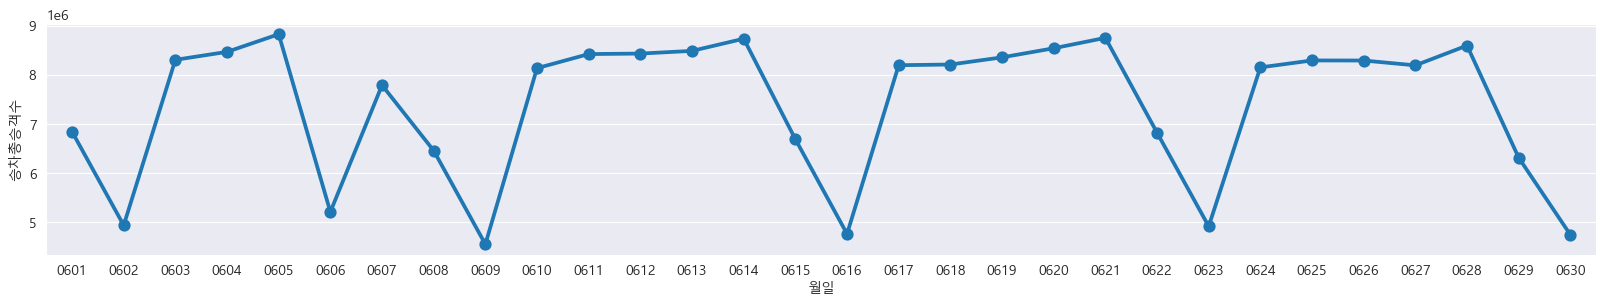

In [35]:
fig, ax = plt.subplots(figsize=(20,3))
sns.pointplot(data = df_pivot, x='월일', y='승차총승객수')      # 반복적인 패턴 확인

#### 월별 일자별 그래프 그리기

In [36]:
raw['연월'].unique()

array(['201901', '201902', '201903', '201904', '201905', '201906'],
      dtype=object)

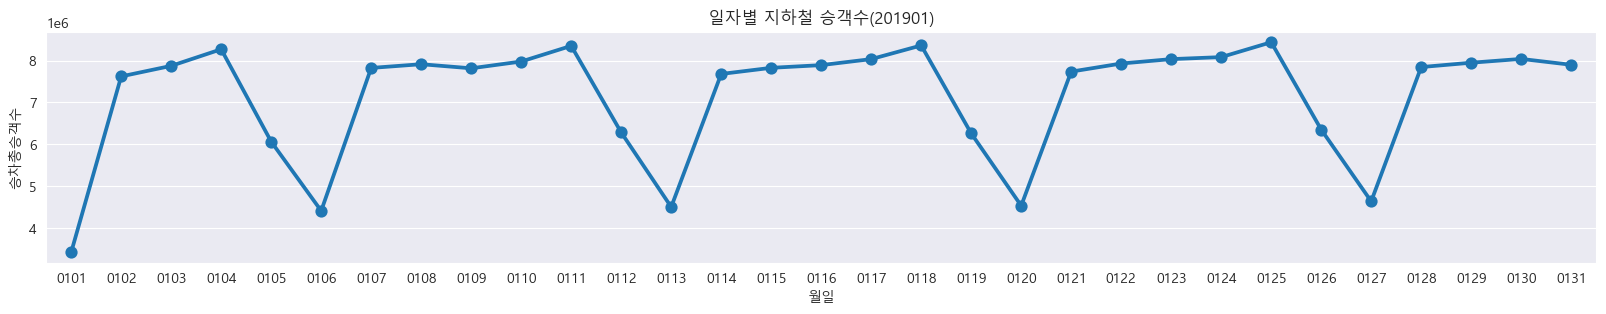

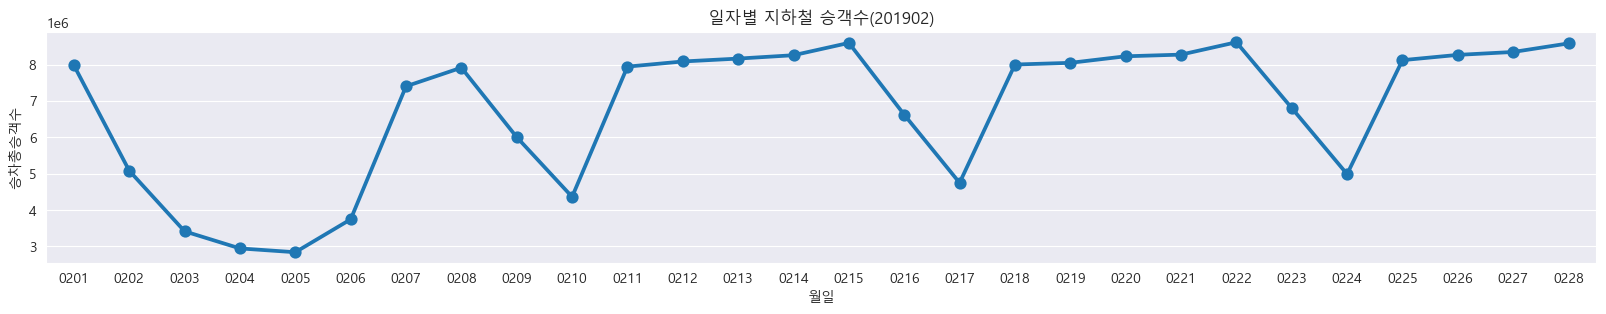

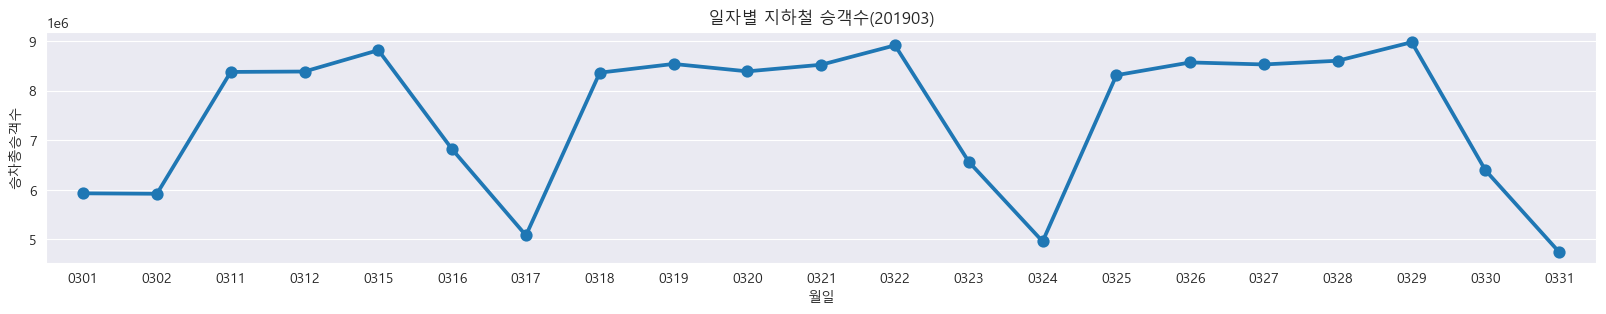

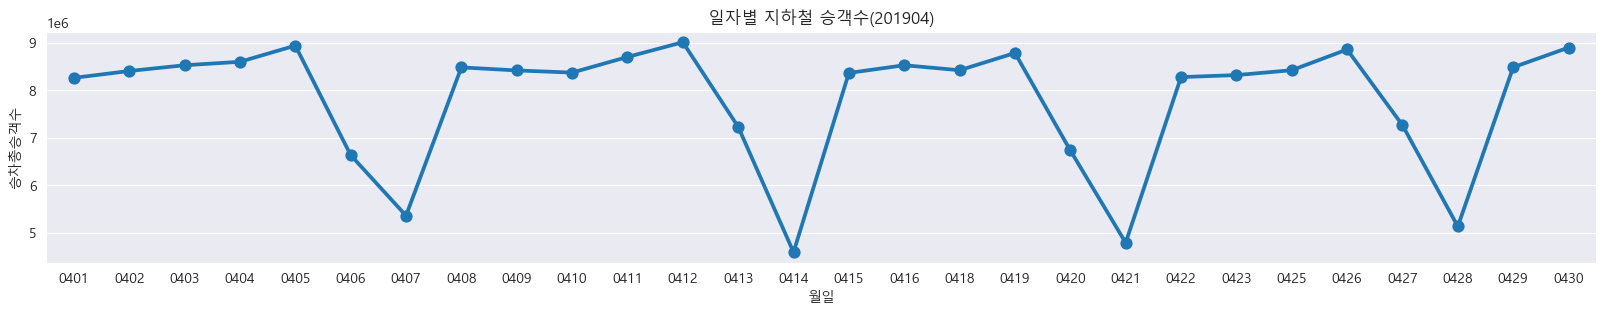

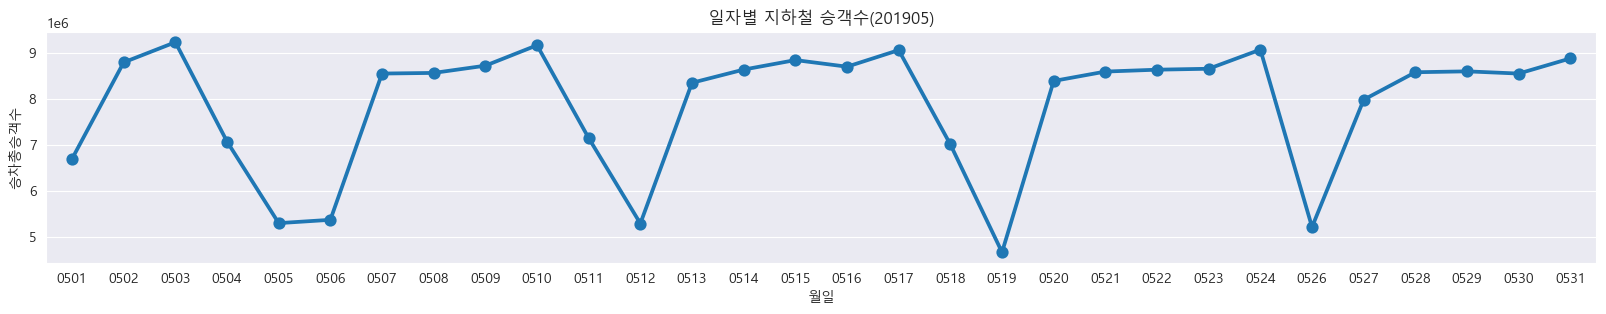

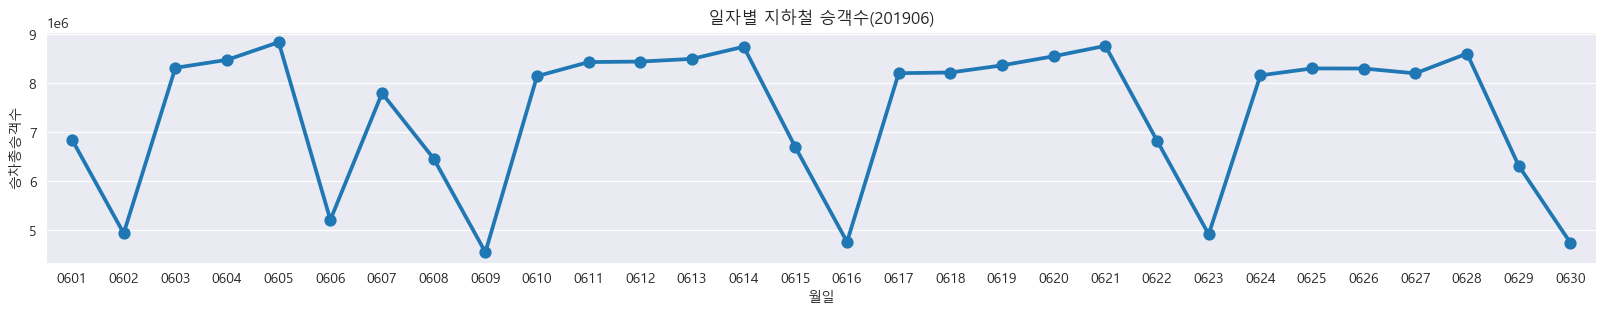

In [38]:
for yearmonth in raw['연월'].unique():
    # print(yearmonth)

    cond = raw['연월']==yearmonth
    df_selected = raw[cond]

    df_pivot = df_selected.pivot_table(index=['월일', '요일'], values='승차총승객수', aggfunc='sum').reset_index()

    # 그래프
    fig, ax = plt.subplots(figsize=(20,3))
    ax.set_title(f'일자별 지하철 승객수({yearmonth})')  # ax.set_title(f'일자별 지하철 승객수({})'.format(yearmonth)
    sns.pointplot(data = df_pivot, x='월일', y='승차총승객수')


## 어느 역에서 가장 많이 지하철을 탈까?

In [40]:
fpath = './data/subway_raw.xlsx'
raw = pd.read_excel(fpath)

raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,화,경춘선,1323,가평,1520,1436,20190104
1,20190101,화,경춘선,1322,상천,275,114,20190104
2,20190101,화,경춘선,1321,청평,1509,1083,20190104
3,20190101,화,경춘선,1320,대성리,357,271,20190104
4,20190101,화,경춘선,1319,마석,1772,1963,20190104


In [41]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   요일      99342 non-null  object
 2   노선명     99342 non-null  object
 3   역ID     99342 non-null  int64 
 4   역명      99342 non-null  object
 5   승차총승객수  99342 non-null  int64 
 6   하차총승객수  99342 non-null  int64 
 7   등록일자    99342 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


### 가장 승객이 많이 타는 역

In [45]:
data_station = raw.pivot_table(index='역명', values='승차총승객수', aggfunc='sum')
data_station = data_station.sort_values(by='승차총승객수', ascending=False)

data_station.head(10)

,승차총승객수
역명,
잠실(송파구청),17273668
강남,16833240
고속터미널,16295461
홍대입구,16018193
서울역,15952147
사당,12304165
신림,11881525
선릉,10725980
구로디지털단지,10577842


### 노선별 역별/요일별 승객 수 비교

In [46]:
raw['노선명'].unique()

array(['경춘선', '경인선', '경의선', '경원선', '경부선', '2호선', '경강선', '수인선', '분당선',
       '9호선2~3단계', '9호선', '8호선', '7호선', '6호선', '공항철도 1호선', '5호선', '4호선',
       '3호선', '1호선', '중앙선', '안산선', '우이신설선', '일산선', '장항선', '과천선'],
      dtype=object)

In [60]:
line = '1호선'
data_line = raw[raw['노선명']==line]

df_pivot = data_line.pivot_table(index=['역ID', '역명'], columns='요일', values='승차총승객수', aggfunc='sum')      # 역ID를 통해 역 순서대로 배치
df_pivot = df_pivot[['월', '화', '수', '목', '금', '토', '일']]
df_pivot = df_pivot/10000       # 만명 단위
df_pivot

,요일,월,화,수,목,금,토,일
역ID,역명,,,,,,,
150,서울역,139.3534,145.0435,129.4993,146.4058,171.3426,130.5254,98.2663
151,시청,64.0200,71.3864,62.8091,70.3511,76.2319,50.9676,29.8211
152,종각,112.1870,119.7708,108.1454,120.9061,132.2916,86.4711,52.9500
153,종로3가,83.8255,87.3786,80.0413,89.9436,97.7886,88.0772,53.8763
154,종로5가,68.4973,72.1713,63.9769,72.8118,78.3878,68.7458,33.1649
155,동대문,35.6532,37.3526,32.9555,36.5131,40.0480,39.2698,32.3882
156,신설동,41.5996,43.1354,38.6989,43.0631,46.7609,32.3935,24.1796
157,제기동,52.3596,53.7898,47.5634,53.5471,56.2030,49.6330,32.9532
158,청량리(서울시립대입구),63.5328,66.3575,58.9248,65.9927,70.9061,63.2366,46.9806


<Axes: title={'center': '1호선 역별/일별 승객 수'}, xlabel='요일', ylabel='역ID-역명'>

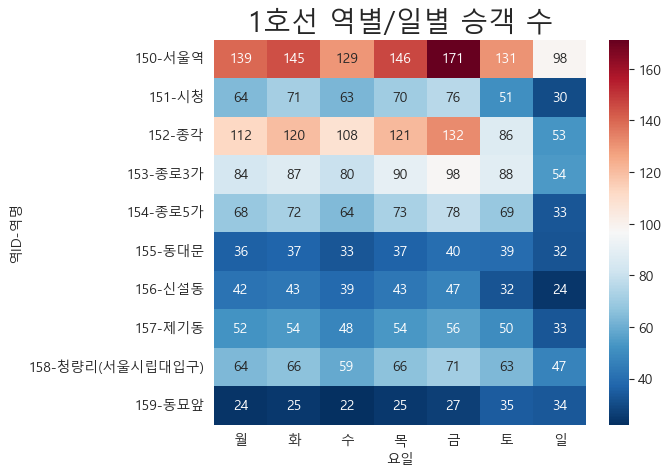

In [66]:
# 히트맵
fig, ax = plt.subplots(figsize=(6,5))
plt.title('1호선 역별/일별 승객 수', fontsize=20)
sns.heatmap(df_pivot, cmap='RdBu_r',
            annot=True, fmt='.0f')

In [68]:
# 노선 리스트
line_seoul_list = []
for line in raw['노선명'].unique():
    # 공항철도 제외 마지막 두 자리가 '호선'
    if line[1:]=='호선':
        print(line)
        line_seoul_list.append(line)

2호선
9호선
8호선
7호선
6호선
5호선
4호선
3호선
1호선


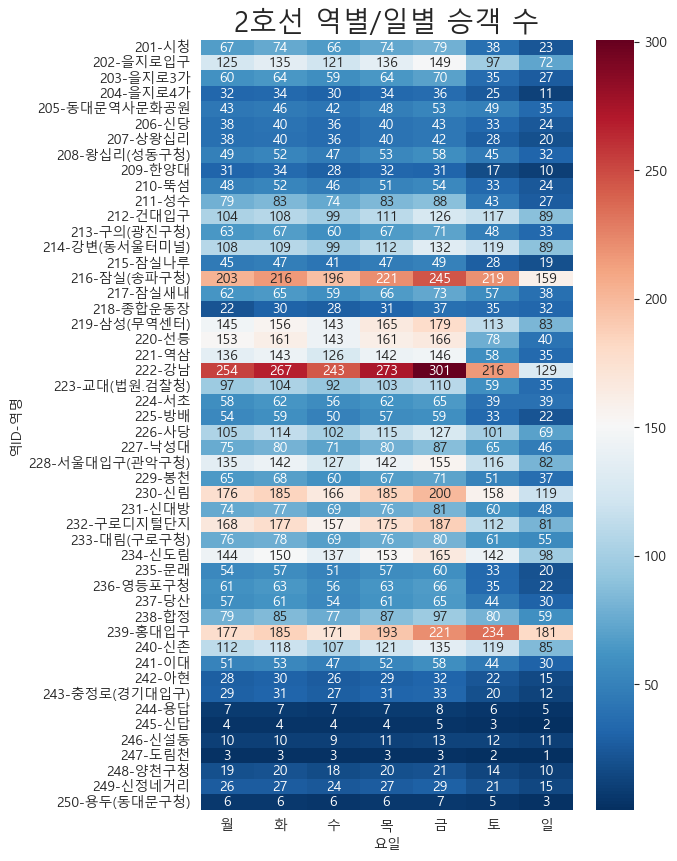

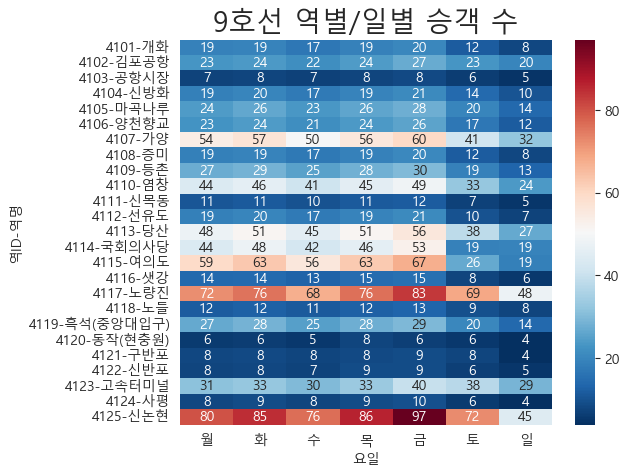

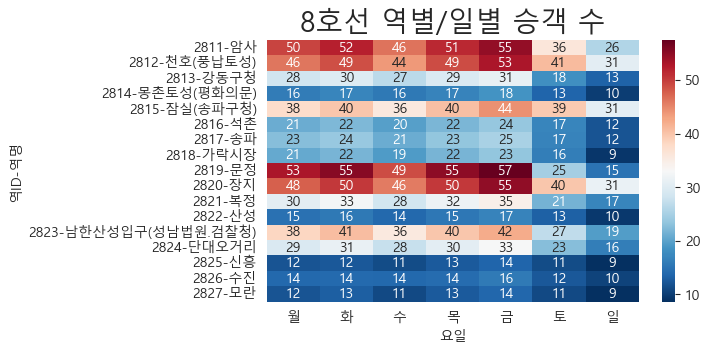

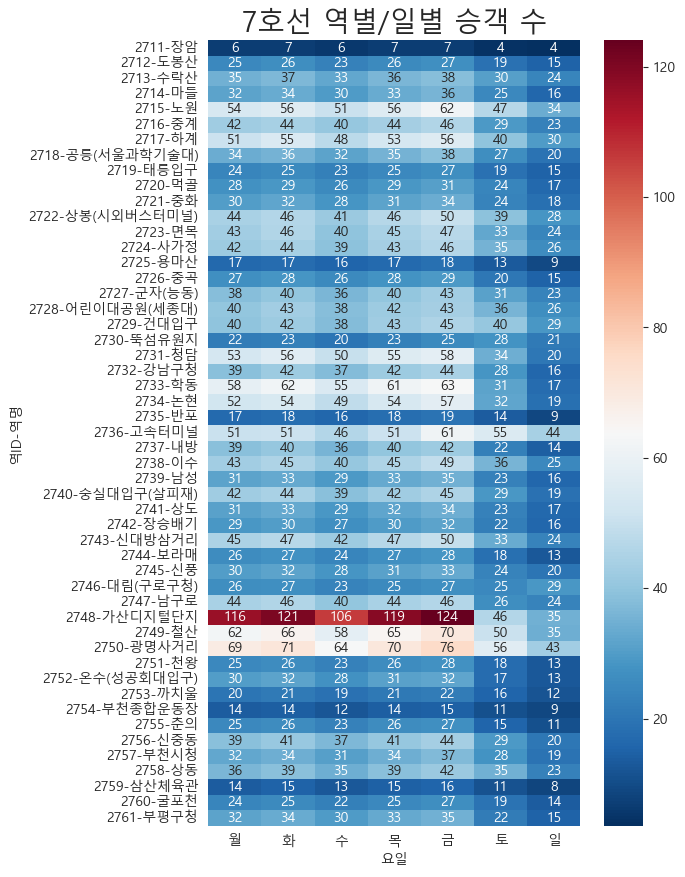

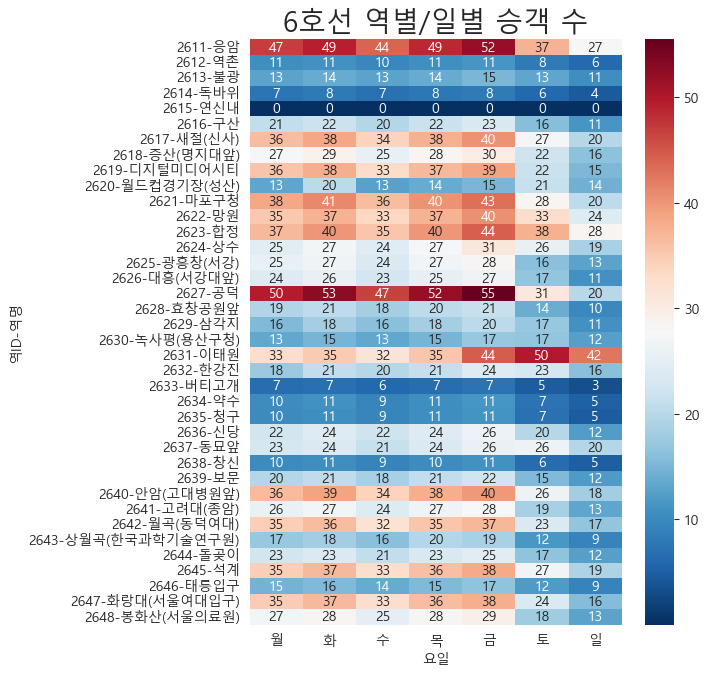

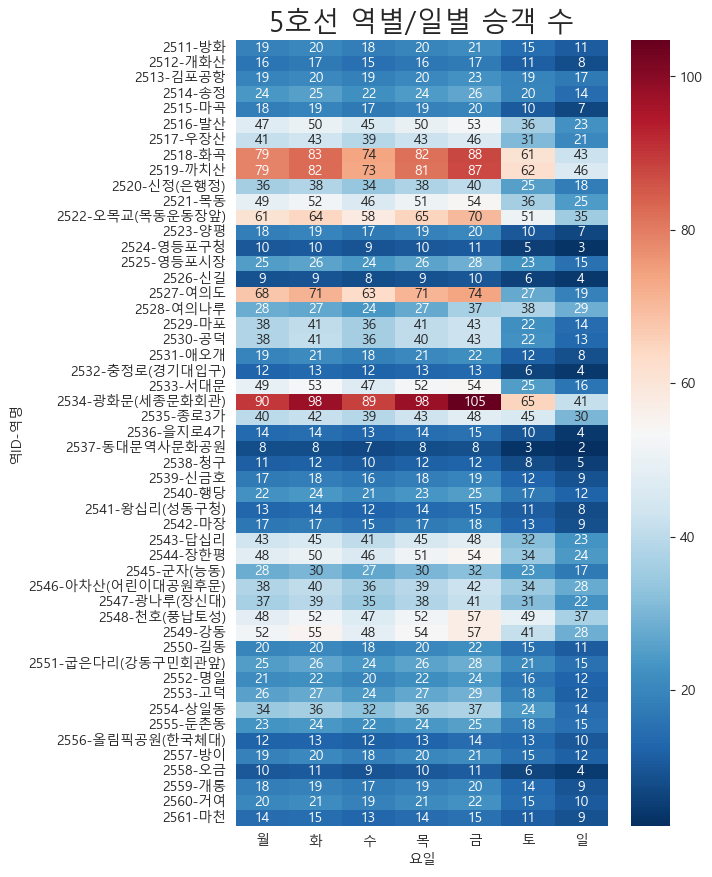

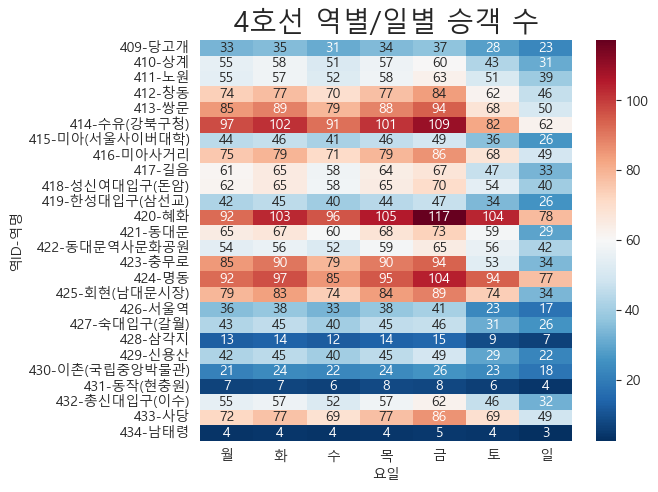

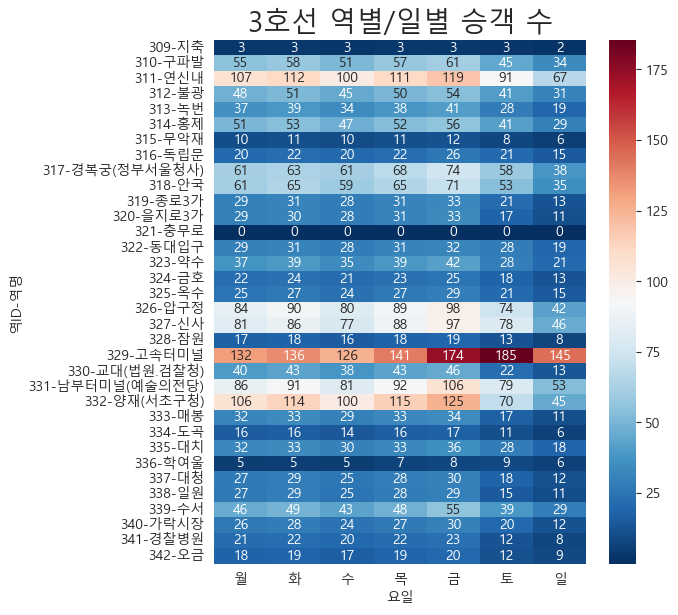

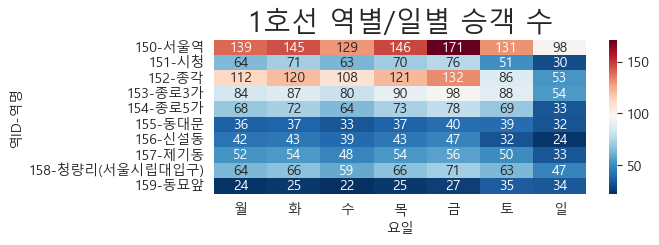

In [74]:
# 호선별 열별/일별 승객 수
for line in line_seoul_list:

    data_line = raw[raw['노선명']==line]
    df_pivot = data_line.pivot_table(index=['역ID', '역명'], columns='요일', values='승차총승객수', aggfunc='sum')
    df_pivot = df_pivot[['월', '화', '수', '목', '금', '토', '일']]
    df_pivot = df_pivot/10000

    fig, ax = plt.subplots(figsize=(6,len(df_pivot)/5))
    plt.title(f'{line} 역별/일별 승객 수', fontsize=20)
    sns.heatmap(df_pivot, cmap='RdBu_r',
                annot=True, fmt='.0f')